In [1]:
#Importing Essentials Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
import seaborn as sns
import matplotlib.cm as cm
import itertools
%matplotlib inline

In [3]:
#Reading train.csv file
data = pd.read_csv('train.csv')

In [4]:
data.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
data.shape

(159571, 8)

In [6]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [7]:
data.tail(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159561,ffd2e85b07b3c7e4,"""\nNo he did not, read it again (I would have ...",0,0,0,0,0,0
159562,ffd72e9766c09c97,"""\n Auto guides and the motoring press are not...",0,0,0,0,0,0
159563,ffe029a7c79dc7fe,"""\nplease identify what part of BLP applies be...",0,0,0,0,0,0
159564,ffe897e7f7182c90,Catalan independentism is the social movement ...,0,0,0,0,0,0
159565,ffe8b9316245be30,The numbers in parentheses are the additional ...,0,0,0,0,0,0
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
# finding all the rows where the sum of labels is zero i.e the comment is a Clean comment
rowsums=data.iloc[:,2:].sum(axis=1)
data['clean']=(rowsums==0)
data['clean'].sum()


143346

In [10]:
rowsums=data.iloc[:,2:8].sum(axis=1)
data['Toxicity_lvl']=round(rowsums)

Added a clean column to identify the comments which are clean

In [11]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'clean', 'Toxicity_lvl'],
      dtype='object')

In [12]:
len(data[data['toxic'] == 1])

15294

In [13]:
data.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,Toxicity_lvl
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,True,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,False,4
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,True,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,True,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,True,0


C:\Users\dgnc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


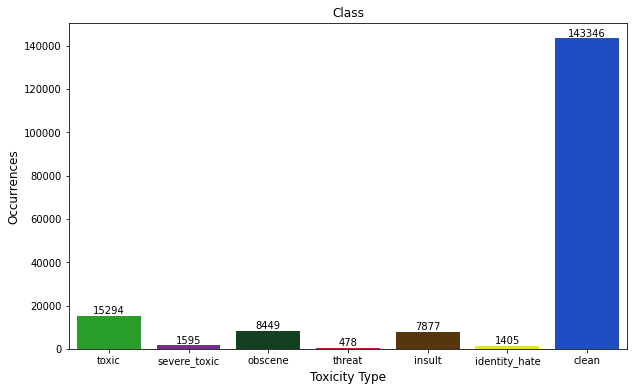

In [14]:
# Using seaborn and matplotlib to visualize the count of different categories of toxicity of comments

colors_list = ["green", "purple","pine green","red", "brown","yellow", "blue"]

palette= sns.xkcd_palette(colors_list)

x=data.iloc[:,2:9].sum()

plt.figure(figsize=(10,6))
# x.index has all the toxicity labels and x.values has their respective count
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Class")
plt.xlabel('Toxicity Type', fontsize = 12)
plt.ylabel('Occurrences', fontsize=12)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

plt.show()

Taking an insight of the length of the comments in the dataset.

In [15]:
comment = data['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object


Since, the length of comment seems to be very large, hence, doing more analysis over the length of comments

In [16]:
x = np.array([len(comment[i]) for i in range(comment.shape[0])])
print("""The maximum length of comment is:{} 
        \nThe minimum length of the comment is:{} 
        \nAnd the average length of a comment is: {}""".format(x.max(),x.min(),x.mean()))

The maximum length of comment is:5000 
        
The minimum length of the comment is:6 
        
And the average length of a comment is: 394.0732213246768


In [18]:
label = data[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head(10))
label = label.values

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0
5      0             0        0       0       0              0
6      1             1        1       0       1              0
7      0             0        0       0       0              0
8      0             0        0       0       0              0
9      0             0        0       0       0              0


In [19]:
label.shape

(159571, 6)

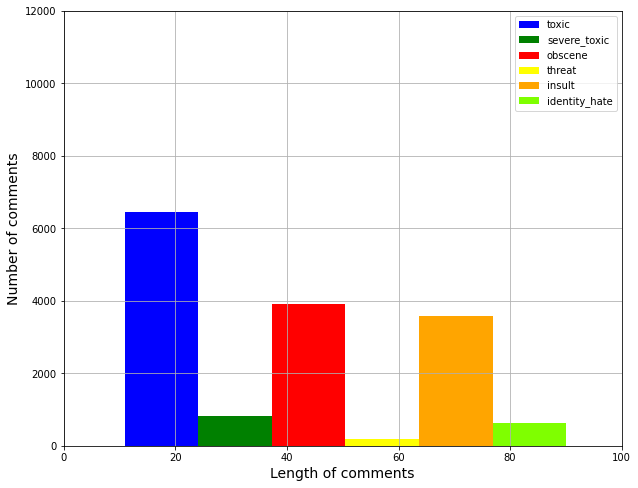

In [20]:
# Creating a zero matrix of shape (159571,6)
y = np.zeros(label.shape)
for i in range(label.shape[0]):
    l = len(comment[i])
    if label[i][0] :
        y[i][0] = l
    if label[i][1] :
        y[i][1] = l
    if label[i][2] :
        y[i][2] = l
    if label[i][3] :
        y[i][3] = l
    if label[i][4] :
        y[i][4] = l
    if label[i][5] :
        y[i][5] = l


In [21]:
print(y.shape)
print(y)

(159571, 6)
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


Removing excessive length comments

In [23]:
# creating a list of comments with less than 400 length of words.
trim_comments = [comment[i] for i in range(comment.shape[0]) if len(comment[i])<=500 ]

# creating corresponding labels for those comments
my_labels = np.array([label[i] for i in range(comment.shape[0]) if len(comment[i])<=500 ])

In [ ]:
print(len(trim_comments))
print(len(my_labels))
print("Thus number of removed comments = {}".format(159571-125626))

125626
125626
Thus number of removed comments = 33945


Preprocessing of the comments.
This involves :

Removing punctuation and special characters from the comments
Removing Stop words i.e removing such words that don't add to the meaning of the sentence.
Stemming and Lemmatizing the words.
Applying count Vectoriser
Splitting dataset into training and testing.

In [ ]:
# Punctuation removal

import string
print(string.punctuation)
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
print (punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [ ]:
# Stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
# Adding alphabets to the set
for i in range(ord('a'),ord('z')+1):
    stop_words.add(chr(i))
# print(stop_words)


{'once', 'their', 'ourselves', 'f', 'down', 'will', 'couldn', "won't", 'after', 'now', "mustn't", 've', 'am', 'ma', 'so', "hadn't", 'she', "that'll", 'from', 'own', 'w', 'which', 'over', 'our', 'had', 'b', "wasn't", 'few', 'mustn', 'under', "you're", 'you', 'him', 'j', 'where', 'i', 'do', 'h', 'won', 'myself', 'for', 'me', 'did', 'this', 'himself', 'while', 'e', 'in', 'nor', 'my', "don't", 'about', 'its', 'shan', 'up', 'against', 'again', 'z', 'at', 'weren', 'aren', 'don', 'that', "mightn't", 'below', 's', 'themselves', 'more', 'been', 'having', 'with', 'as', 'or', 'wasn', 'ours', 'k', "it's", 'between', 'other', 'hadn', 'until', 'only', 'we', 'no', 'are', 'wouldn', 'be', 'it', 'were', 'all', 'g', "shan't", 'here', 'who', 'and', 'didn', 'yours', 'p', 'being', 'not', 'haven', 'is', 'doing', 'very', "didn't", 'when', 'than', 'itself', 'y', 'most', "haven't", "doesn't", 'because', 'was', 'have', 't', 'they', 'can', "should've", "shouldn't", 'should', 'but', 'what', "isn't", 'by', 'mightn'

In [ ]:
# Stemming and Lemmatizing
from nltk.stem import WordNetLemmatizer, PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [ ]:
# Looping through all the comments and processing them through the functions defined above.

for i in range(len(trim_comments)):
    trim_comments[i] = trim_comments[i].lower().translate(trantab)
    word_list = []
    for word in trim_comments[i].split():
        if not word in stop_words:
            word_list.append(stemmer.stem(lemmatizer.lemmatize(word,pos="v")))
    trim_comments[i]  = " ".join(word_list)

In [ ]:
# Comments after stop words removal, stemming and lemmatizing.
for i in range(10):
    print(trim_comments[i],"\n")


explan edit make usernam hardcor metallica fan revert vandal closur ga vote new york doll fac pleas remov templat talk page sinc i'm retir 

d'aww match background colour i'm seemingli stick thank talk januari utc 

hey man i'm realli tri edit war guy constantli remov relev inform talk edit instead talk page seem care format actual info 

sir hero chanc rememb page that' 

congratul well use tool well · talk 

cocksuck piss around work 

vandal matt shirvington articl revert pleas ban 

sorri word 'nonsense' offens anyway i'm intend write anyth articl wow would jump vandal i'm mere request encycloped one use school refer select breed page almost stub point 'anim breeding' short messi articl give info must someon around expertis eugen 

align subject contrari dulithgow 

bbq man let discuss mayb phone 



In [ ]:
# Applying count vectorizer

from sklearn.feature_extraction.text import CountVectorizer
 
#create object supplying our custom stop words
count_vector = CountVectorizer(stop_words=stop_words)
#fitting it to converts comments into bag of words format
tf = count_vector.fit_transform(trim_comments[:10000]).toarray()

In [ ]:
tf.shape

(10000, 17296)

In [ ]:
def shuffle(matrix, target, test_proportion):
    ratio = int(matrix.shape[0]/test_proportion)
    X_train = matrix[ratio:,:]
    X_test =  matrix[:ratio,:]
    Y_train = target[ratio:,:]
    Y_test =  target[:ratio,:]
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = shuffle(tf, my_labels[:10000],3)

print(X_test.shape)
print(X_train.shape)

(3333, 17296)
(6667, 17296)


In [ ]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

1. Logistic Regression Model

In [ ]:
# clf will be the list of the classifiers for all the 6 labels
# each classifier is fit with the training data and corresponding classifier
from sklearn.linear_model import LogisticRegression
clf = []
for i in range(6):
    clf.append(LogisticRegression())
    clf[i].fit(X_train,Y_train[:,i])

In [ ]:
# predict list contains the predictions, it is transposed later to get the proper shape
predict = []
for i in range(6):
    predict.append(clf[i].predict(X_test))

predict = np.asarray(np.transpose(predict))
print(predict.shape)

(3333, 6)


In [ ]:
evaluate_score(Y_test,predict)

Hamming_loss : 2.585258525852585
Accuracy : 89.73897389738974
Log_loss : 1.8439563996112658


2. SVM Binary Relevance 

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
classifier = BinaryRelevance(classifier = SVC(), require_dense = [False, True])
classifier.fit(X_train, Y_train)

BinaryRelevance(classifier=SVC(), require_dense=[False, True])

In [ ]:
#predictions
predictions = classifier.predict(X_test)

In [ ]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 2.9102910291029103
Accuracy : 89.7989798979898
Log_loss : 1.493646456884211


3. SVM chain Classifier

In [ ]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.svm import SVC

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(SVC())

# train
classifier.fit(X_train, Y_train)

ClassifierChain(classifier=SVC(), require_dense=[True, True])

In [ ]:
#predictions
predictions = classifier.predict(X_test)

In [ ]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 2.8352835283528353
Accuracy : 90.06900690069007
Log_loss : 1.2667634664895946
